# Grade: /100 pts

# Assignment 7: Tree methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league (soccer) matches between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

*Do not forget to include labels in your figures.*

*Take advantage of `n_jobs=-1` where applicable.*

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk 
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

import pydotplus 
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 310
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span>.

**Points will be deducted if your answer is not in the variable mentioned above**

In [2]:
#
dataRaw = pd.read_csv('/content/PL_matches.csv')
dataKnown = (dataRaw.drop(dataRaw.columns[3:27],1))
shape_vector =dataKnown.shape
print(shape_vector)

(3957, 35)


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification. This variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. 
2. In which game was the greatest goal difference? What was the result of the game? Store the home team of the game in **home_team**, away in **away_team** and result in **game_result**.
3. Drop all variables related to the  result of the game including the name of the teams, except for the target.
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

**Hint:** To create the target variable you should use the split function from pandas. Take a look to the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html).


**Points will be deducted if your answer is not in the variable names mentioned above.**

In [3]:
from scipy.sparse import data
from numpy.lib.function_base import append

x = dataKnown['result_full'].str.split('-')
targetRaw = []
for i in x:

  targetRaw.append((int(i[0]), int(i[1])))

target =[]
highestdif = [0,0]
count = 0
index = 0
for i in targetRaw:
  if(abs(i[0]-i[1]) > abs(highestdif[0]- highestdif[1])):
    highestdif = i
    index = count
  if(i[0]==i[1]):target.append(2)
  if(i[0] > i[1]):target.append(0)
  if(i[0] < i[1]):target.append(1)
  count += 1
dataKnown["target"]=target
homeWon = dataKnown[dataKnown['target']==0]
tied = dataKnown[dataKnown['target']==1]
awayWon = dataKnown[dataKnown['target']==2]
home_team = dataKnown.iloc[index].home_team
away_team = dataKnown.iloc[index].away_team
score =  dataKnown.iloc[index].result_full
print('Highest differential')
print('Home Team:', )
print('Score: ', highestdif[0], home_team)

print('Away Team:', )
print('Score: ', highestdif[1], away_team)

print('total data: ', tied.size + awayWon.size + homeWon.size)
print('count: ')
print('home won: ', np.round(homeWon.size*100/dataKnown.size,1))
print('away won: ', np.round(awayWon.size*100/dataKnown.size,1))
print('tied: ', np.round(tied.size*100/dataKnown.size,1))


dataReady = dataKnown.drop(['home_team', 'away_team', 'result_full'],1)

Highes differential
Home Team:
Score:  0 Southampton
Away Team:
Score:  9 Leicester City
total data:  142452
count: 
home won:  45.4
away won:  24.6
tied:  30.0


**Written Answer:**

The data is not balanced as home has 45% it be balanced if they were all 33% or closer to it at leat.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of columns and report only those with pairwise correlation absolute value greater than 0.9. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows (i.e., 3) is not deterministic. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.) 

|Index|Variable 1|Variable 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

  
- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- In the pairwise PCCs, identify those variables without the term "possession" in their names and drop them from the dataframe.


In [4]:
#
correlation= dataKnown.drop('target',1).corr(method="pearson")
ci = 0
sig = []
for i in np.array(correlation):
  cj = 0
  for j in i:
    significant = abs(j) > 0.9
    if(significant):
      if(ci !=cj):
        if(((cj,ci) in sig)):
          break;
        sig.append((ci,cj))
      
    cj+=1
  ci+=1
print(sig)
corrDF = pd.DataFrame({})
for i in sig:
  sigCorr = {'Correlation':correlation.iloc[i[0]].iloc[i[1]], 'Var_1':correlation.index[i[0]],"Var_2":correlation.index[i[1]]}
  corrDF = corrDF.append(sigCorr, ignore_index=True)



[(4, 5), (4, 9), (20, 21), (20, 25)]


In [5]:
corrDF

Correlation            Var_1                Var_2
0     0.935083  passes_avg_home  possession_avg_home
1     0.990809  passes_avg_home     touches_avg_home
2     0.934452  passes_avg_away  possession_avg_away
3     0.990702  passes_avg_away     touches_avg_away

**Written Answer:**
These pairs are highly correlated as the more passes the more touches a player gets, and the more passes the higher the possesion. While its the inverse too, the more possesion of the ball you have the more passes you can make, same for touches, as it's almost being interchangeable with passes.

In [6]:
dataNoCorr = dataReady.drop(['passes_avg_home', 'touches_avg_home', 'passes_avg_away','touches_avg_away'],1)
dataNoCorr

clearances_avg_home  corners_avg_home  fouls_conceded_avg_home  \
0                    38.4               4.6                     11.3   
1                    29.8               5.6                     12.3   
2                    29.1               6.1                     10.8   
3                    32.3               4.0                     13.7   
4                    38.7               5.0                     12.1   
...                   ...               ...                      ...   
3952                 13.0               6.6                     10.2   
3953                 20.2               4.0                     11.2   
3954                 19.2               3.8                     10.4   
3955                 20.4               4.7                     12.3   
3956                 23.4               3.9                     10.4   

      offsides_avg_home  possession_avg_home  red_cards_avg_home  \
0                   3.4                 48.3                 0.1   
1                   2.2                 52.7                 0.1   
2                   2.9                 57.6                 0.0   
3                   2.0                 35.7                 0.0   
4                   2.9                 51.6                 0.0   
...                 ...                  ...                 ...   
3952                1.7                 64.3                 0.0   
3953                2.3                 41.5                 0.0   
3954                1.6                 40.8                 0.1   
3955                2.1                 41.4                 0.1   
3956                1.7                 38.8                 0.0   

      shots_on_target_avg_home  tackles_avg_home  yellow_cards_avg_home  \
0                          4.4              18.8                    1.2   
1                          5.3              24.0                    1.6   
2                          5.6              17.3                    1.6   
3                          4.0              18.3                    2.3   
4                          4.5              21.3                    1.1   
...                        ...               ...                    ...   
3952                       5.9              12.7                    1.0   
3953                       2.9              13.5                    1.3   
3954                       3.1              16.5                    1.2   
3955                       3.0              16.5                    1.8   
3956                       3.3              12.8                    1.9   

      goals_scored_ft_avg_home  ...  red_cards_avg_away  \
0                         1.44  ...                 0.1   
1                         1.35  ...                 0.2   
2                         2.33  ...                 0.2   
3                         0.67  ...                 0.0   
4                         1.08  ...                 0.0   
...                        ...  ...                 ...   
3952                      2.05  ...                 0.1   
3953                      0.69  ...                 0.0   
3954                      1.12  ...                 0.0   
3955                      0.58  ...                 0.1   
3956                      1.21  ...                 0.0   

      shots_on_target_avg_away  tackles_avg_away  yellow_cards_avg_away  \
0                          4.1              20.0                    1.6   
1                          4.6              22.0                    2.0   
2                          6.3              21.2                    1.8   
3                          3.3              25.0                    2.0   
4                          6.3              19.4                    1.4   
...                        ...               ...                    ...   
3952                       3.5              16.8                    1.5   
3953                       4.5              17.7                    1.8   
3954                       5.9         

### Q2.1 - <span style="color:red">[40]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Points will be deducted if your answer is not in the variable names mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [7]:

# 
X = dataNoCorr.drop('target',1)
y = dataNoCorr["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state= seed)

oob_sqrt = []
oob_log2 = []
oob_none = []
index = []
for i  in range(3,264,20):
  print(i)
  RFC_sqrt = RandomForestClassifier(random_state=seed,oob_score=True, n_estimators=i, max_features='sqrt',n_jobs=-1).fit(X_train,y_train).oob_score_
  RFC_log2 = RandomForestClassifier(random_state=seed,oob_score=True,n_estimators=i, max_features='log2', n_jobs=-1).fit(X_train,y_train).oob_score_
  RFC_none = RandomForestClassifier(random_state=seed,oob_score=True, n_estimators=i, max_features=None, n_jobs=-1).fit(X_train,y_train).oob_score_
  oob_sqrt.append(RFC_sqrt)
  oob_log2.append( RFC_log2)
  oob_none.append(RFC_none)
  index.append(i)



3
23
43
63
83
103
123
143
163
183
203
223
243
263


In [8]:
bestOOBModel = RandomForestClassifier(random_state=seed,oob_score=True, n_estimators=263, max_features='sqrt',n_jobs=-1).fit(X_train,y_train , sample_weight=None)

    nTrees      sqrt      log2      none
0        3  0.430119  0.427230  0.423619
1       23  0.475262  0.477790  0.461538
2       43  0.485374  0.485013  0.472373
3       63  0.483929  0.486457  0.493680
4       83  0.501625  0.499097  0.490791
5      103  0.508126  0.495486  0.496930
6      123  0.505959  0.507403  0.497291
7      143  0.509570  0.503792  0.504514
8      163  0.509209  0.510293  0.504153
9      183  0.518238  0.511737  0.504514
10     203  0.517515  0.511737  0.508848
11     223  0.515710  0.507765  0.509209
12     243  0.517154  0.505959  0.508487
13     263  0.519321  0.512821  0.506320
Best OOB Score:  0.5193602693602694


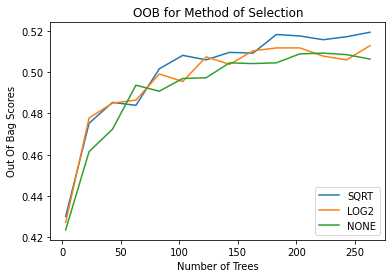

In [9]:
oobDF = pd.DataFrame()
oobDF['nTrees'] = np.array(index)
oobDF['sqrt'] = np.array(oob_sqrt)
oobDF['log2'] = np.array(oob_log2)
oobDF['none'] = np.array(oob_none)
plt.plot(index, oob_sqrt, label='SQRT')
plt.plot(index, oob_log2,label='LOG2')
plt.plot(index, oob_none, label='NONE')
plt.xlabel("Number of Trees")
plt.ylabel("Out Of Bag Scores")
plt.title('OOB for Method of Selection')
plt.legend(loc='lower right')
print(oobDF)
y_pred = bestOOBModel.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print('Best OOB Score: ', accuracy1)
cm = confusion_matrix(y_test, y_pred, labels = bestOOBModel.classes_)

0.5193602693602694


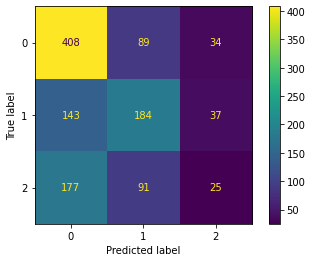

In [10]:
print(accuracy1)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= bestOOBModel.classes_ ).plot()
plt.show()

In [11]:
features = bestOOBModel.classes_.tostring()
x = export_graphviz(
    bestOOBModel.estimators_[100], 
    out_file=None, 
    feature_names = bestOOBModel.feature_names_in_,
    class_names = ['Home Win', 'Tie', 'Away Win'],
    filled = True
    )
graph = pydotplus.graph_from_dot_data(x)
image = graph.create_png()


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.714174 to fit



In [12]:
Image(image)

**Written Answer:** 

I would have to say it's not a good  as it doesnt really provide a very accurate overall predictions on the data, as it mostly just predicts home wins and ties, and rarely predicts away wins. It's a decent at predicting home wins it's accurate 60% of the time, and 50% accurate on ties, which is okay. However, I dont think thats really good when it mostly just predicts wins and it can't provide a high degree of certainty.

### Q2.2 - <span style="color:red">[9]</span> - What are the 5 most important variables for the best (previous) model? Create a barplot reporting their importance scores based on Gini impurity.

Top 5 features:
0 .  red_cards_avg_away
1 .  red_cards_avg_home
2 .  yellow_cards_avg_home
3 .  yellow_cards_avg_away
4 .  offsides_avg_away


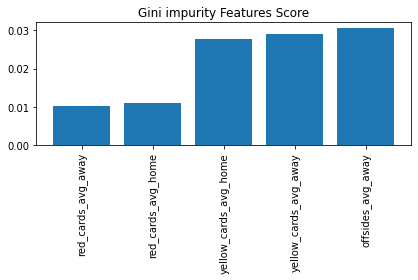

In [13]:
#
sorted_feature = np.argsort(bestOOBModel.feature_importances_)[::1]
top_features = sorted_feature[:5]

plt.bar(range(5), bestOOBModel.feature_importances_[top_features])
plt.title("Gini impurity Features Score")
plt.xticks(range(5), X_train.columns[top_features], rotation=90)
plt.tight_layout()

print('Top 5 features:' )
for i in range(5):
  print(i+1,'. ', X_train.columns[top_features][i])

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [25, 50, 100]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]
 
2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier in this case?

**Points will be deducted if your answer is not in the variable mentioned above.**

**Use random_state = seed in all the methods that take this argument.**

In [14]:
#
X_forty, X_left, y_forty, y_left = train_test_split(X_train, y_train, train_size=0.4,random_state=seed)


skf = StratifiedKFold(shuffle=True,random_state=seed, n_splits= 5)
xgbc = XGBClassifier()
grid = {
    'n_estimators':[25, 50, 100],
    'max_depth': [8, 25, 42],
    'learning_rate':  [0.1, 0.5, 0.9],
}
gs = GridSearchCV(xgbc, param_grid=grid, cv=skf,n_jobs=-1)
gs_fit = gs.fit(X_forty, y_forty)

In [15]:
print(gs_fit.best_params_)
opt_xgbc = XGBClassifier(learning_rate = 0.9, max_depth = 25, n_estimators = 25)
fitted_xgbc = opt_xgbc.fit(X_train, y_train)

{'learning_rate': 0.9, 'max_depth': 25, 'n_estimators': 25}


In [16]:
accuracy2 = accuracy_score(y_test, fitted_xgbc.predict(X_test))
print(accuracy2)

0.4671717171717172


### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How would you improve the accuracy of the models? Write no more than 5 sentences.

**Written Answer:** 
You could improve the accuracy of the models in a number of ways. For one you could use all data and bootstrap the data to have a more accurate modal. As for the model itself you could reduce the  number of feature so that highly correlated features dont skew the predictions. You could increase the number of of trees but im not im not sure if that would help as there were higher number of trees available. Also maybe include teams as match ups have high correlation

### Q3.3 - <span style="color:red">[9]</span> - What are the 5 most important variables for the XGB classifier? Create a barplot reporting their importance scores based on Gini impurity.

Top 5 features:
0 .  goals_conced_ht_avg_away
1 .  yellow_cards_avg_home
2 .  goals_scored_ht_avg_away
3 .  goals_scored_ft_avg_home
4 .  goals_conced_ft_avg_away


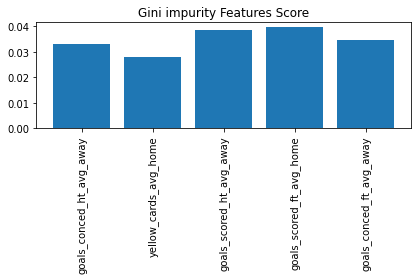

In [17]:
#
sorted_feature = np.argsort(fitted_xgbc.feature_importances_)[::1]
top_features = sorted_feature[:5]

plt.bar(range(5), bestOOBModel.feature_importances_[top_features])
plt.title("Gini impurity Features Score")
plt.xticks(range(5), X_train.columns[top_features], rotation=90)
plt.tight_layout()

print('Top 5 features:' )
for i in range(5):
  print(i+1,'. ', X_train.columns[top_features][i])